### 다중 클래스 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

make_blobs : 등방성(모든 방향으로 같은 성질을 가진다)가우시안 정규분포를 이용해 가상 데이터 생성

https://datascienceschool.net/03%20machine%20learning/09.02%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EA%B0%80%EC%83%81%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1.html

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글 폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

그래프 생성위해서 사용

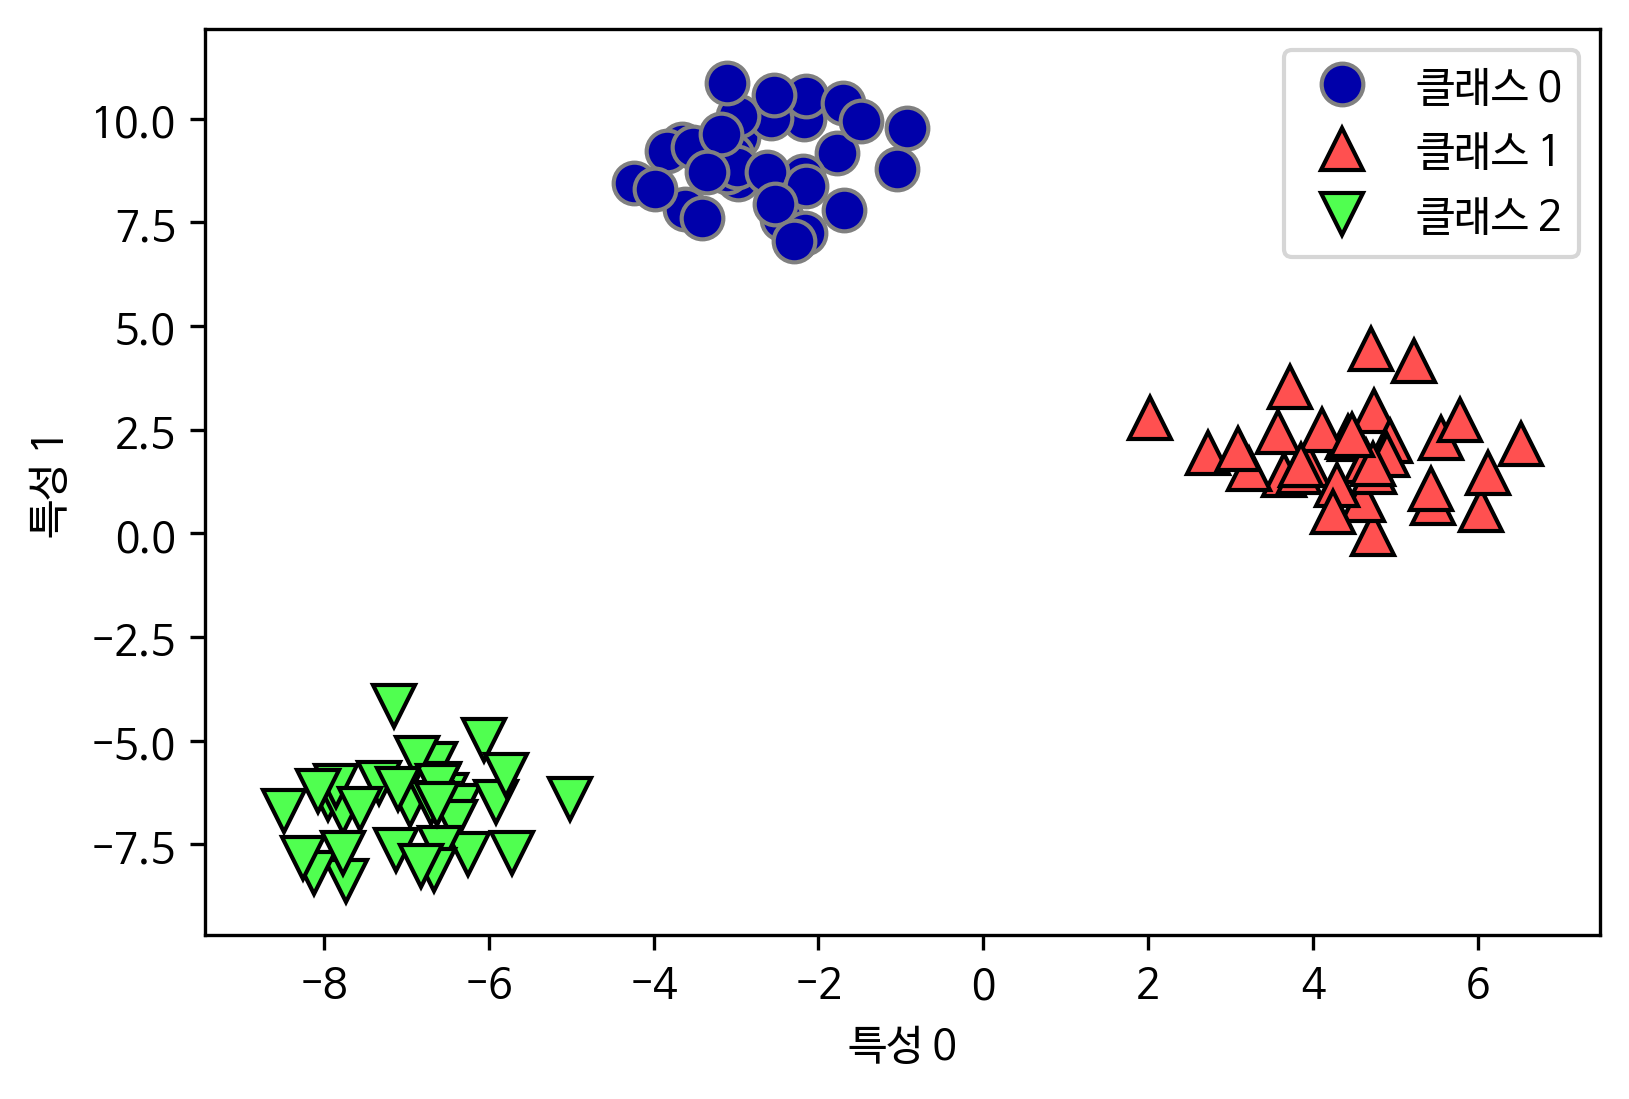

In [3]:
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#산점도 생성
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

In [4]:
logr=LogisticRegression().fit(X,y)
print("계수 배열의 크기:",logr.coef_.shape)
print("절편 배열의 크기:",logr.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


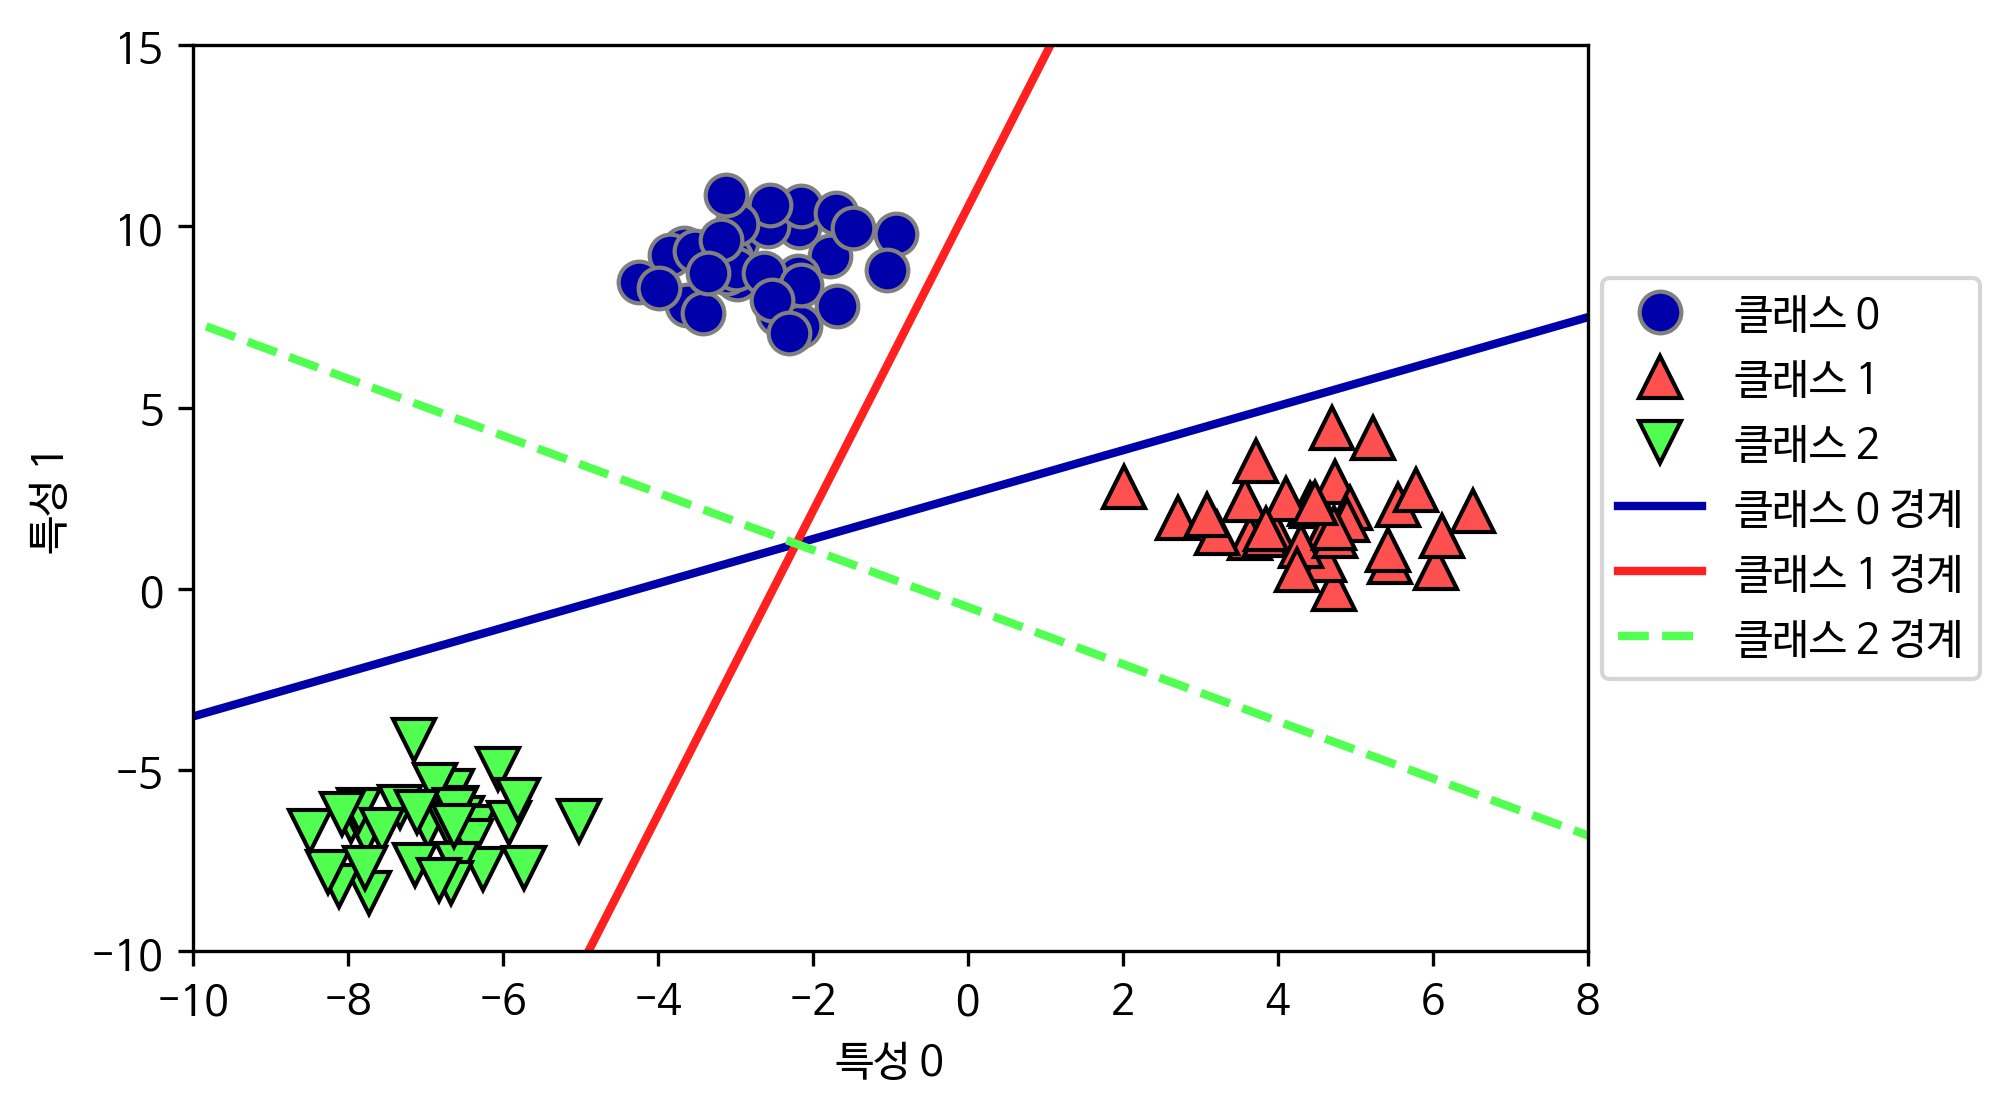

In [5]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)

#1차원 배열 만들기, 그래프 그리기, 수평축 간격 만들기 등에 사용
#https://m.blog.naver.com/choi_s_h/221730568009

for coef, intercept, color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))

In [6]:
print("계수 배열:\n",logr.coef_)

계수 배열:
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


Text(0, 0.5, '특성 1')

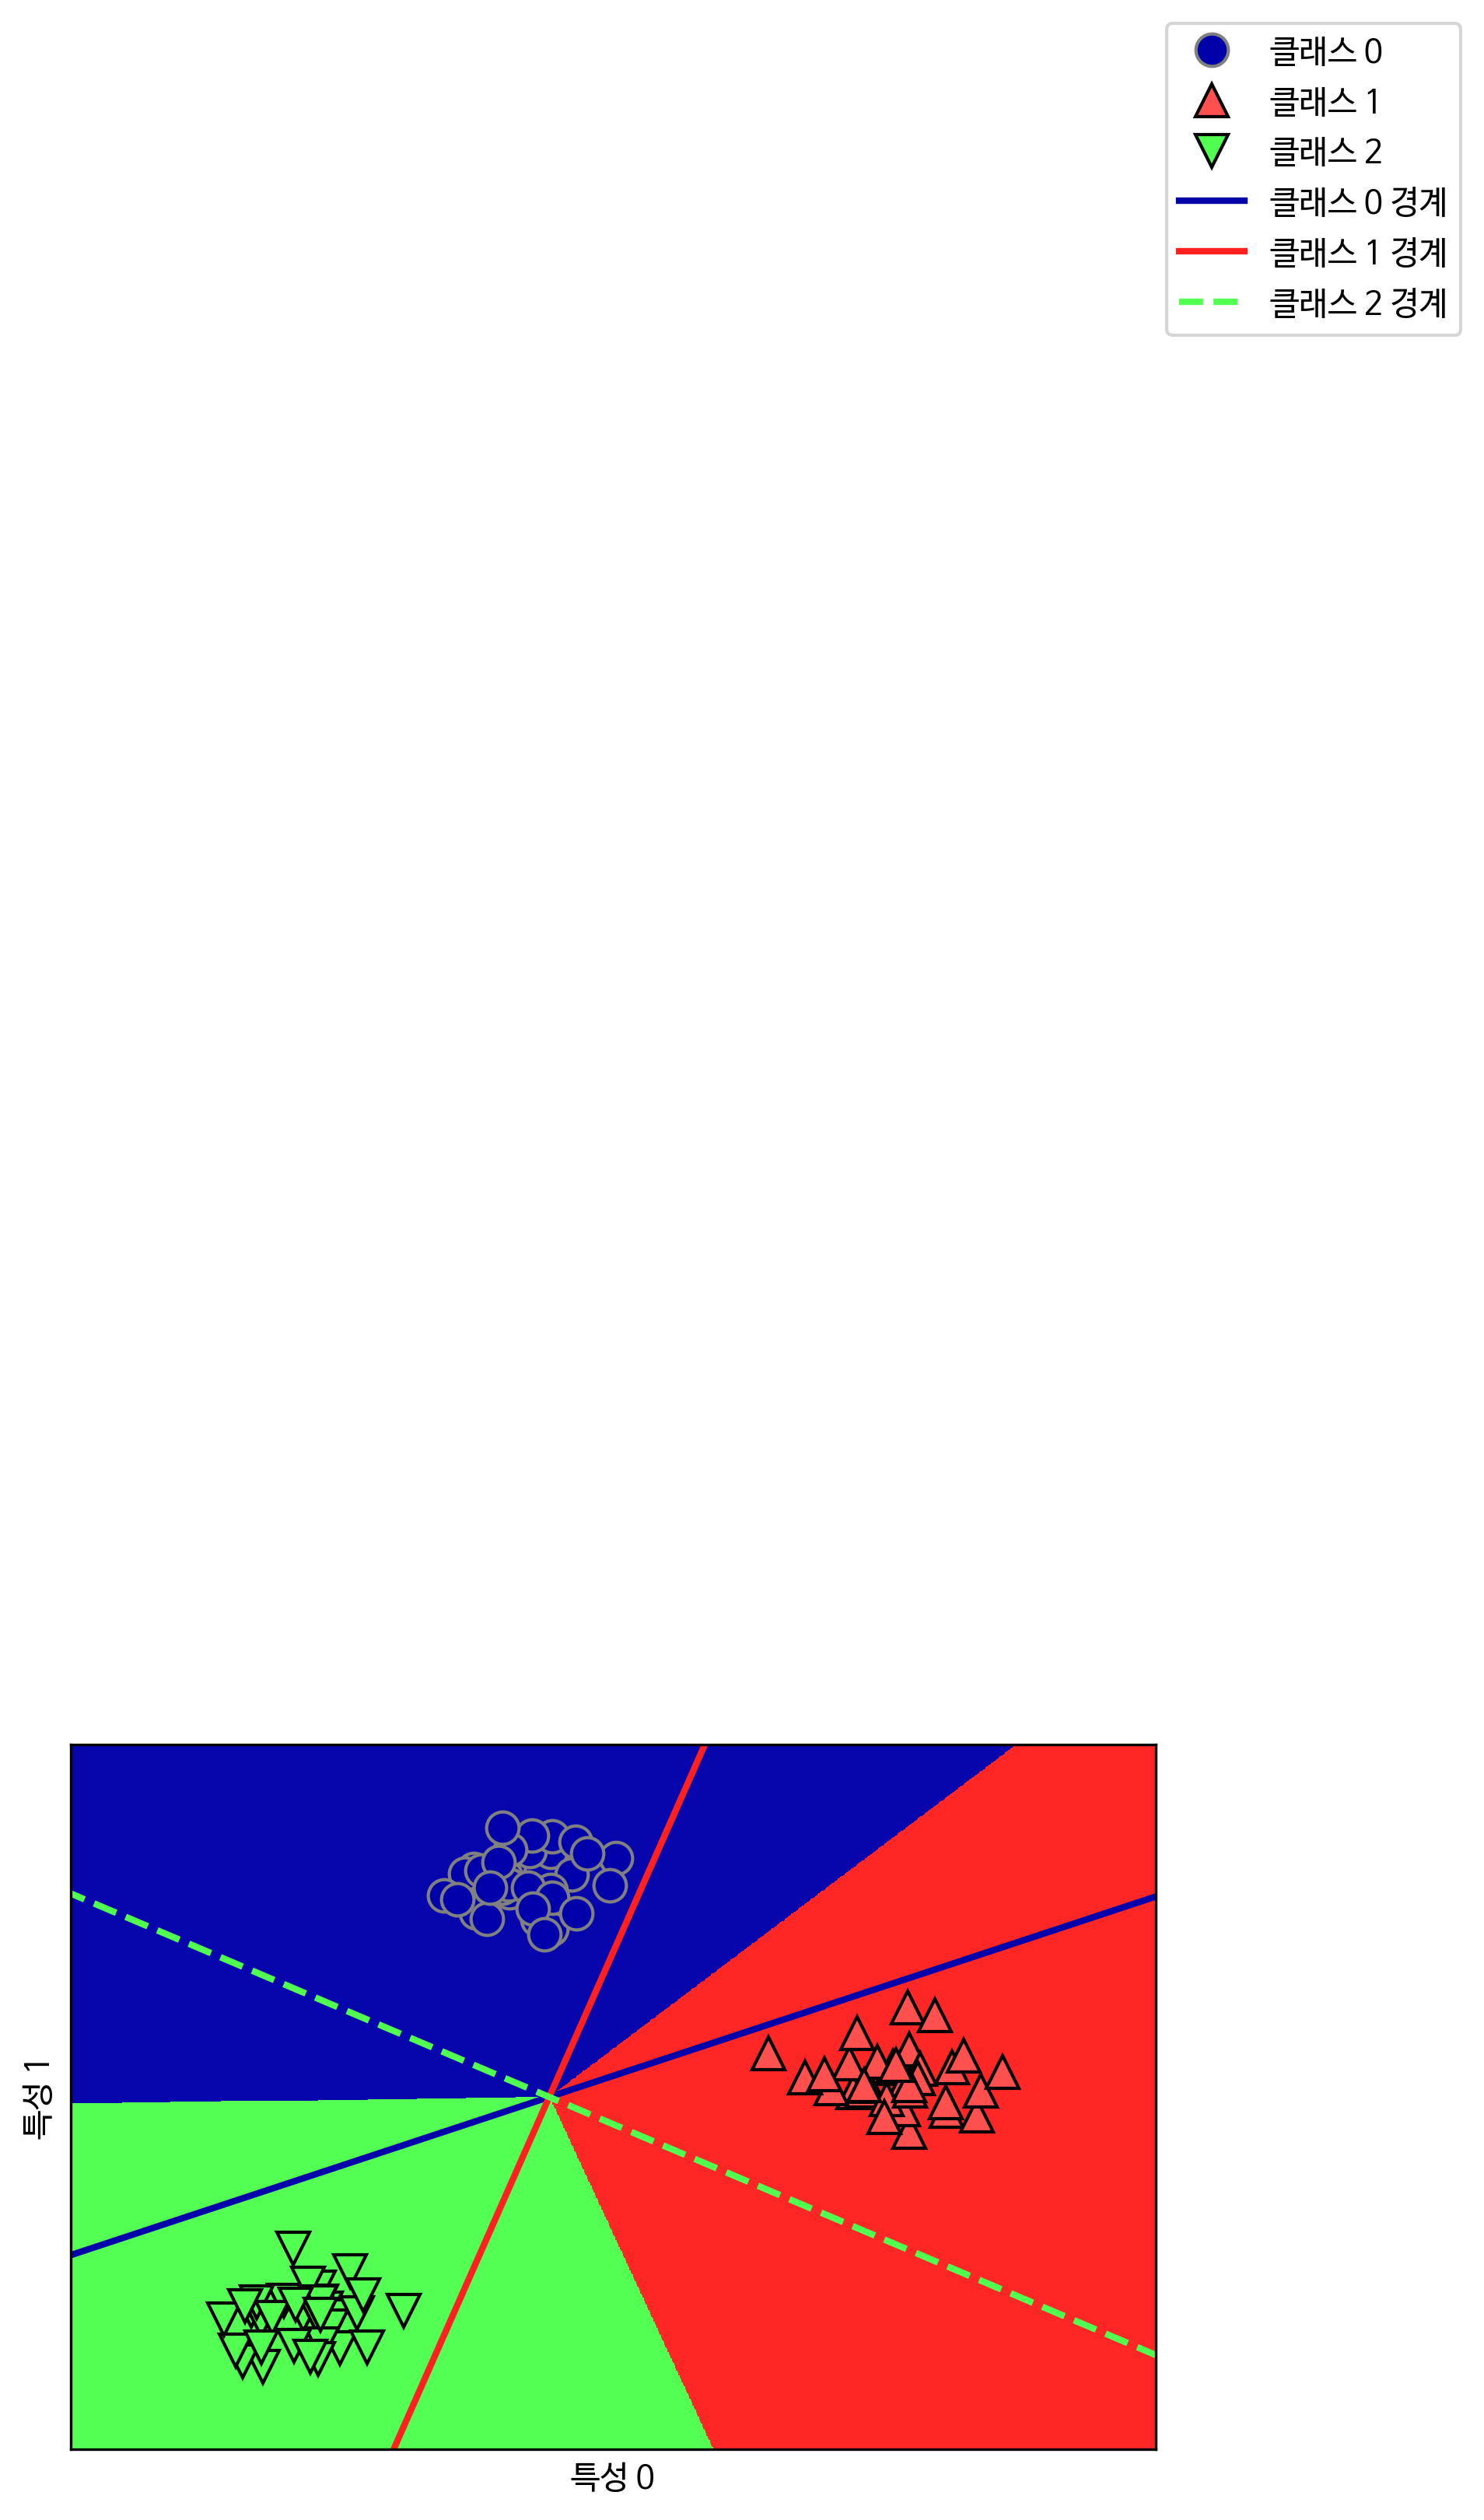

In [7]:
mglearn.plots.plot_2d_classification(logr,X,fill=True,alpha=7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(logr.coef_,logr.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.40)
logr=LogisticRegression().fit(X,y)
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("\n테스트 세트의 정확도: {:.2f}".format(logr.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points:%d",(X_test.shape[0],(y_test!=y_pred.sum())))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total %d points:%d (60, array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True]))


counfusion matrix(오차행렬) : 훈련을 통한 예측 성능을 측정하기 위해 예측 값과 실제 값을 비교하기 위한 표

https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score

In [9]:
print("predict:\n",logr.predict(X_test[:30]))
print("probability:\n",logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


### navie bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

navie bayes

https://jfun.tistory.com/126

gaussian distribution

http://norman3.github.io/prml/docs/chapter02/3_1.html

In [11]:
iris_dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0)

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

nErrors=(y_test!=y_pred).sum()
accuracy=1.0-nErrors/y_test.shape[0]
print("Accuracy: ",accuracy)
print("Number of mislabeled points out of a total %d points:%d",(X_test.shape[0],(y_test!=y_pred).sum()))

Accuracy:  1.0
Number of mislabeled points out of a total %d points:%d (38, 0)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.3)

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

nErrors=(y_test!=y_pred).sum()
accuracy=1.0-nErrors/y_test.shape[0]
print("Accuracy: ",accuracy)
print("Number of mislabeled points out of a total %d points:%d",(X_test.shape[0],(y_test!=y_pred).sum()))

Accuracy:  1.0
Number of mislabeled points out of a total %d points:%d (45, 0)


In [13]:
X_train,X_test,y_train,y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.33)

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

nErrors=(y_test!=y_pred).sum()
#잘못 분류된 샘플 개수 확인
accuracy=1.0-nErrors/y_test.shape[0]
print("Accuracy: ",accuracy)
print("Number of mislabeled points out of a total %d points:%d",(X_test.shape[0],(y_test!=y_pred).sum()))

Accuracy:  0.96
Number of mislabeled points out of a total %d points:%d (50, 2)


In [14]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)

classifierGN=GaussianNB().fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train,y_train)))
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_test,y_test)))

훈련 세트 점수: 0.946
훈련 세트 점수: 0.937


### 결정트리

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

분류와 회귀 모두 가능한 지도 학습 모델

스무고개 하듯이 예/아니요 질문 이어가며 학습

어떤 것을 루트에 올릴지가 중요하다

과대 적합을 줄이기 위해서 파라미터 조절이 필요 (모든 리프가 순수 노드가 될 때 까지 진행하면 안됨)
1. 사전 가지치기(트리 생성 미리 중단)
2. 트리의 최대 깊이 제한
3. 리프의 최대 개수 제한
4. 분할 가능한 포인트의 최소 개수 지정
5. 사후 가지치기(트리 생성 후 노드 삭제/병합)

In [15]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도:0.840


In [16]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)
tree=DecisionTreeClassifier(max_depth=4,random_state=0)

tree.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도:0.800


깊이 제한을 4로 두어 과대적합 방지

In [17]:
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)

print("X_train.shape:{}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))

for max_depth in [1,4,8]:
    tree=DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree.fit(X_train,y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
    print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))

X_train.shape:(426, 30) X_test.shape:(143, 30)
max_depth=1
훈련 세트 정확도: 0.923
테스트 세트 정확도:0.923
max_depth=4
훈련 세트 정확도: 0.988
테스트 세트 정확도:0.951
max_depth=8
훈련 세트 정확도: 1.000
테스트 세트 정확도:0.937


In [18]:
from sklearn.tree import export_graphviz

In [19]:
export_graphviz(tree,out_file="tree.dot",class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False,filled=True)

In [20]:
import graphviz

https://frhyme.github.io/python-lib/graphviz/

graphviz : dot language를 활용한 그래프를 그리기 위한 오픈 소스 툴

설치 후 시스템 환경 변수를 설정해줘야한다. 
설정해주더라도 진행 안되는 경우 컴퓨터를 껐다 켜본다

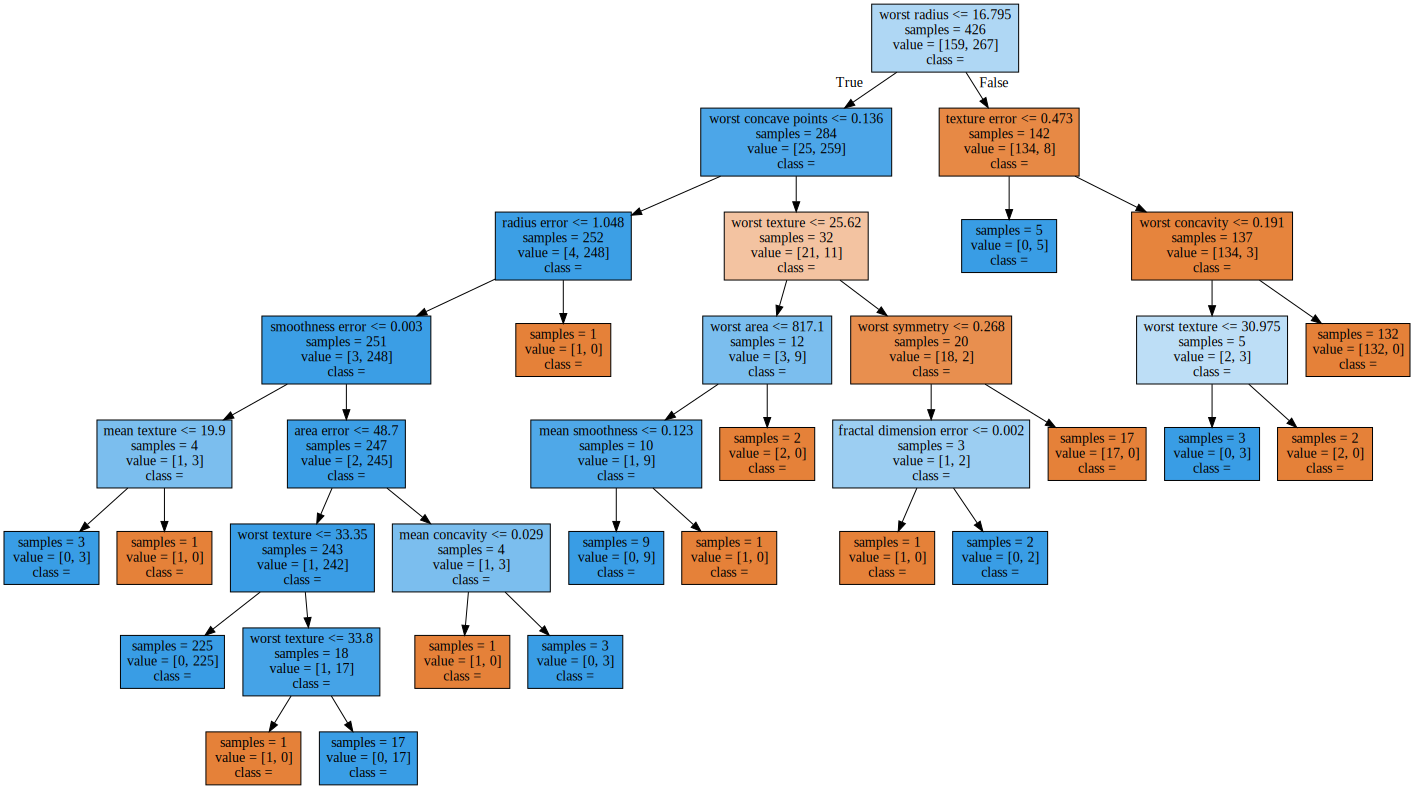

In [21]:
with open("tree.dot",encoding='UTF8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [22]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


각 특성이 얼마나 중요한지를 0-1사이으 숫자로 평가한다

중요도가 낮다고 해서 유용하지 않은 것은 아니다

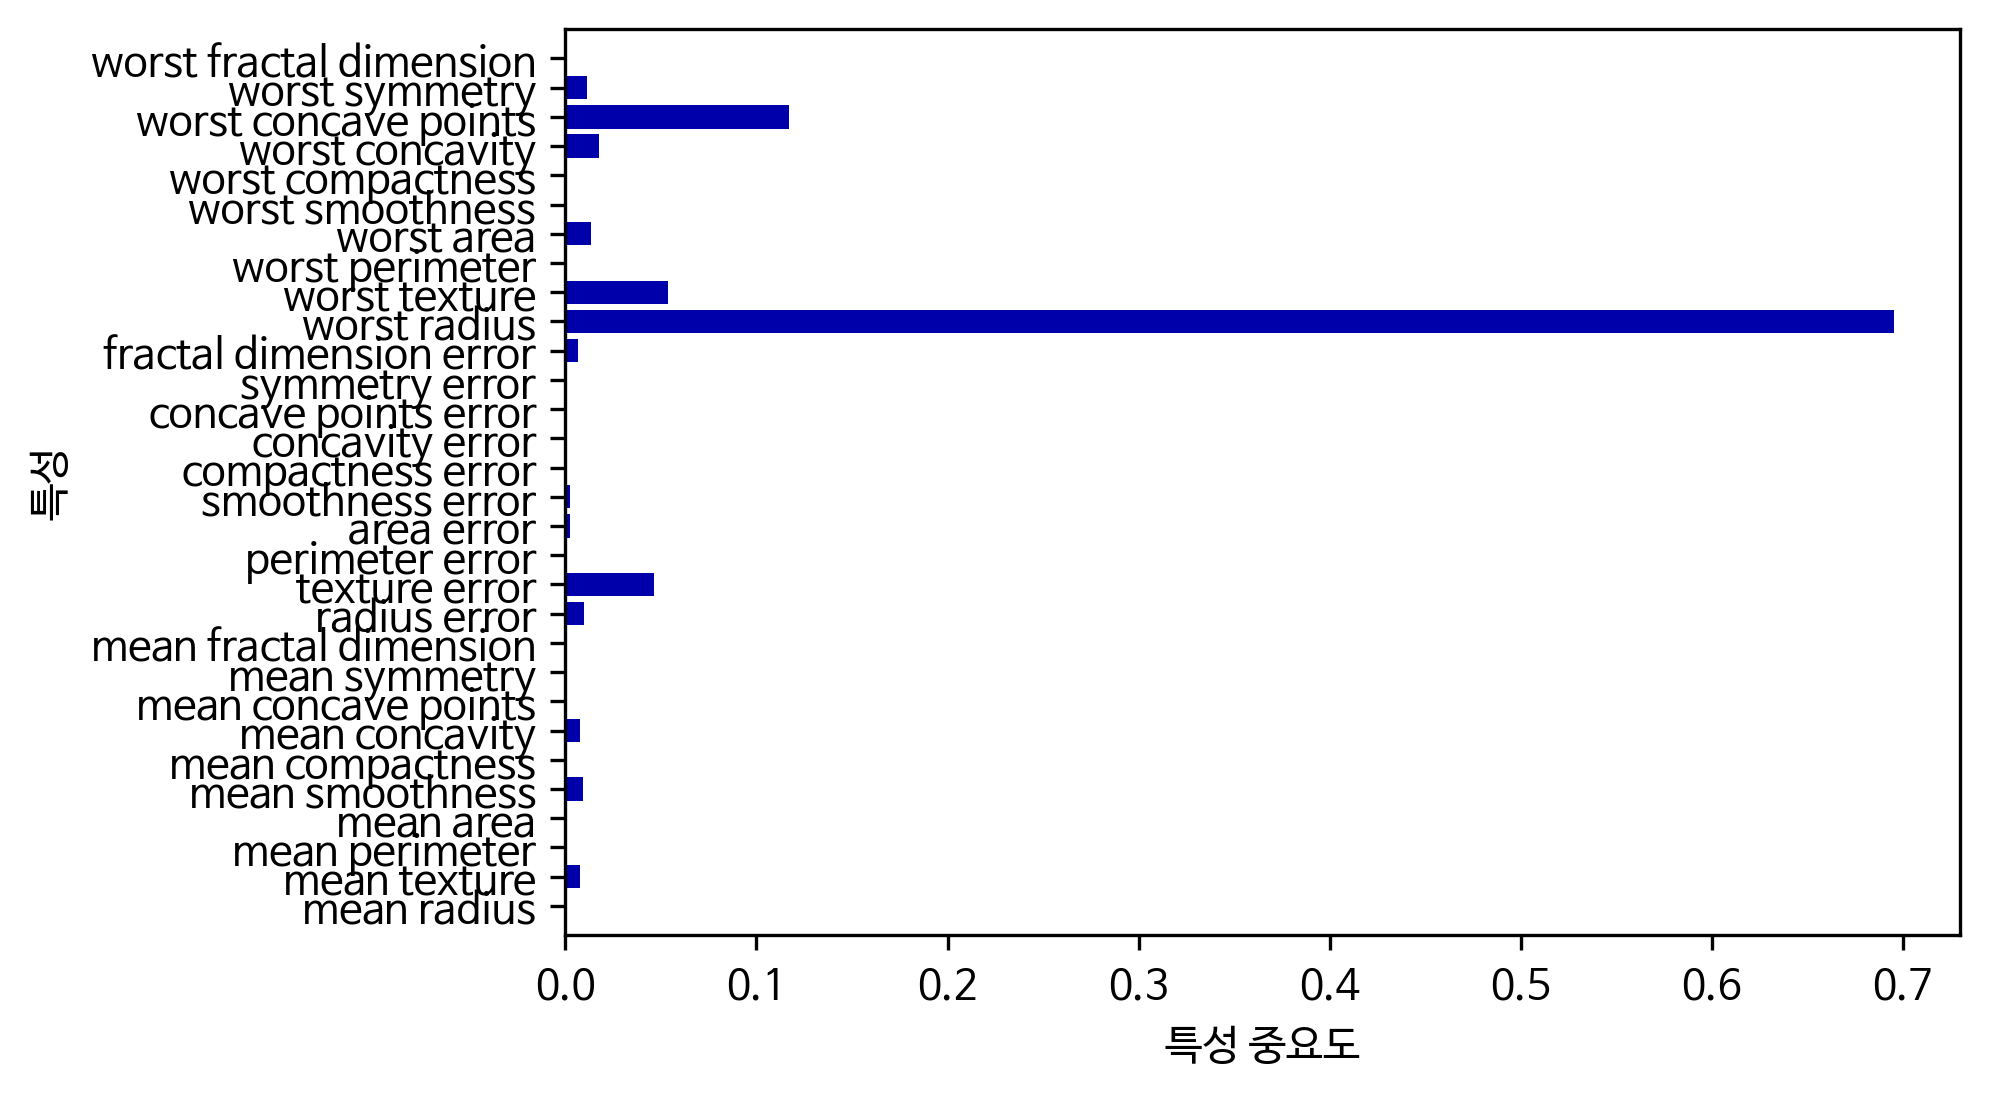

In [23]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


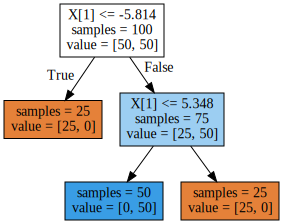

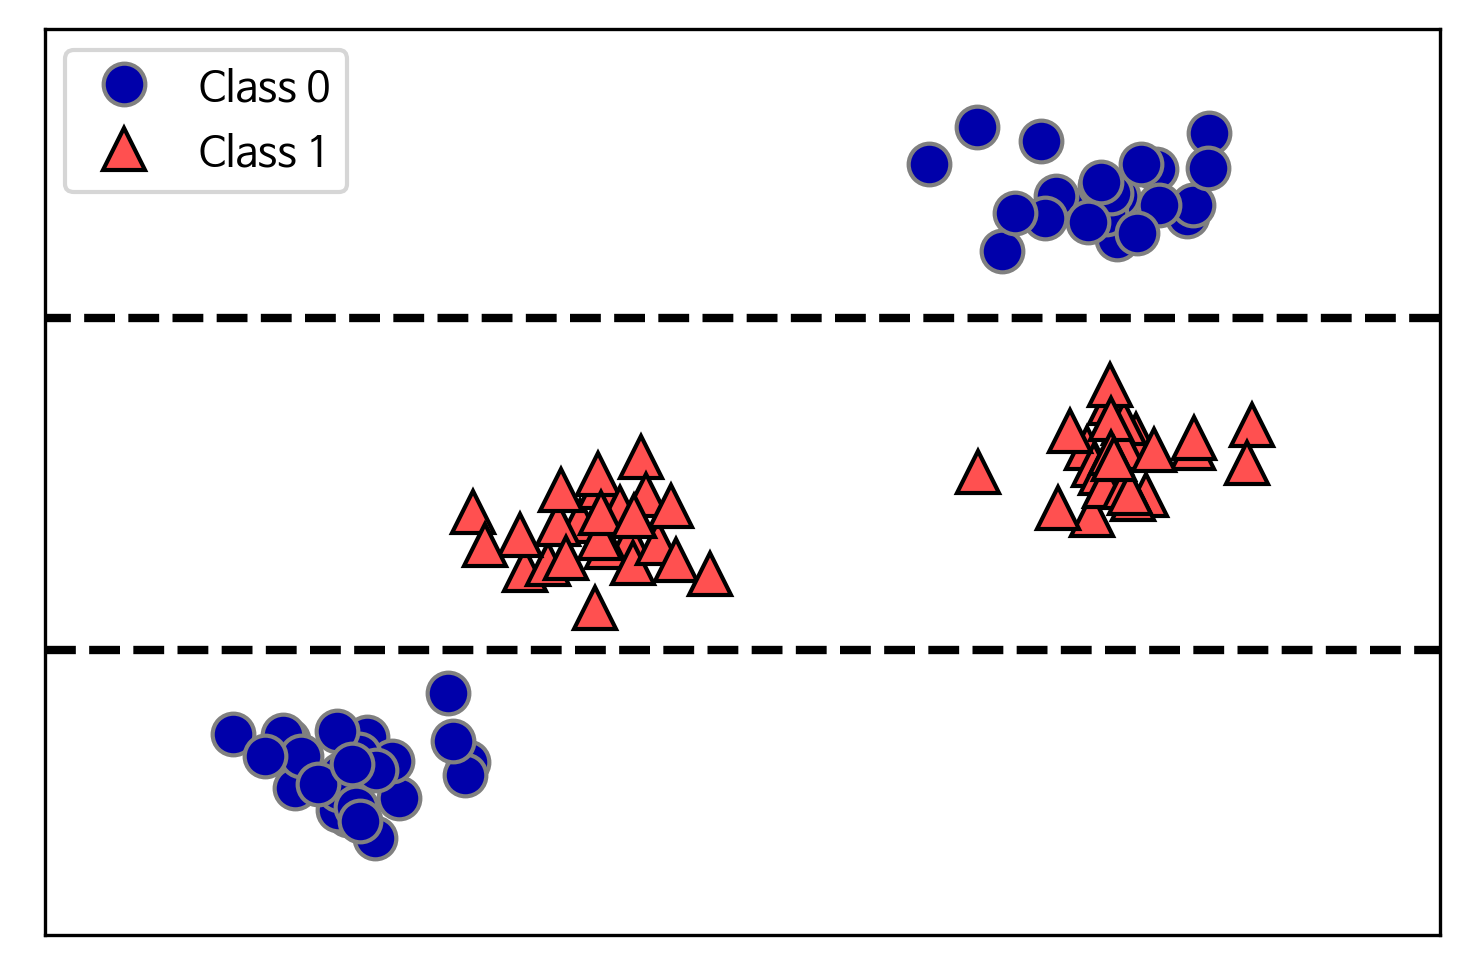

In [24]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

1. 첫 질문의 true(클래스 0 맨 밑 판단 가능)
2. 첫 질문의 false > 두 번째의 true (클래스 1 중간 판단)
3. 첫 질문의 false > 두 번째의 false (클래스 0 맨 위 판단)

결정트리회귀

https://m.blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221242505714&proxyReferer=https:%2F%2Fwww.google.com%2F

In [25]:
import os

In [26]:
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

ram_prices.shape:(333, 3)
ram_prices.keys:Index(['Unnamed: 0', 'date', 'price'], dtype='object')


Text(0, 0.5, '가격 ($/Mbyte)')

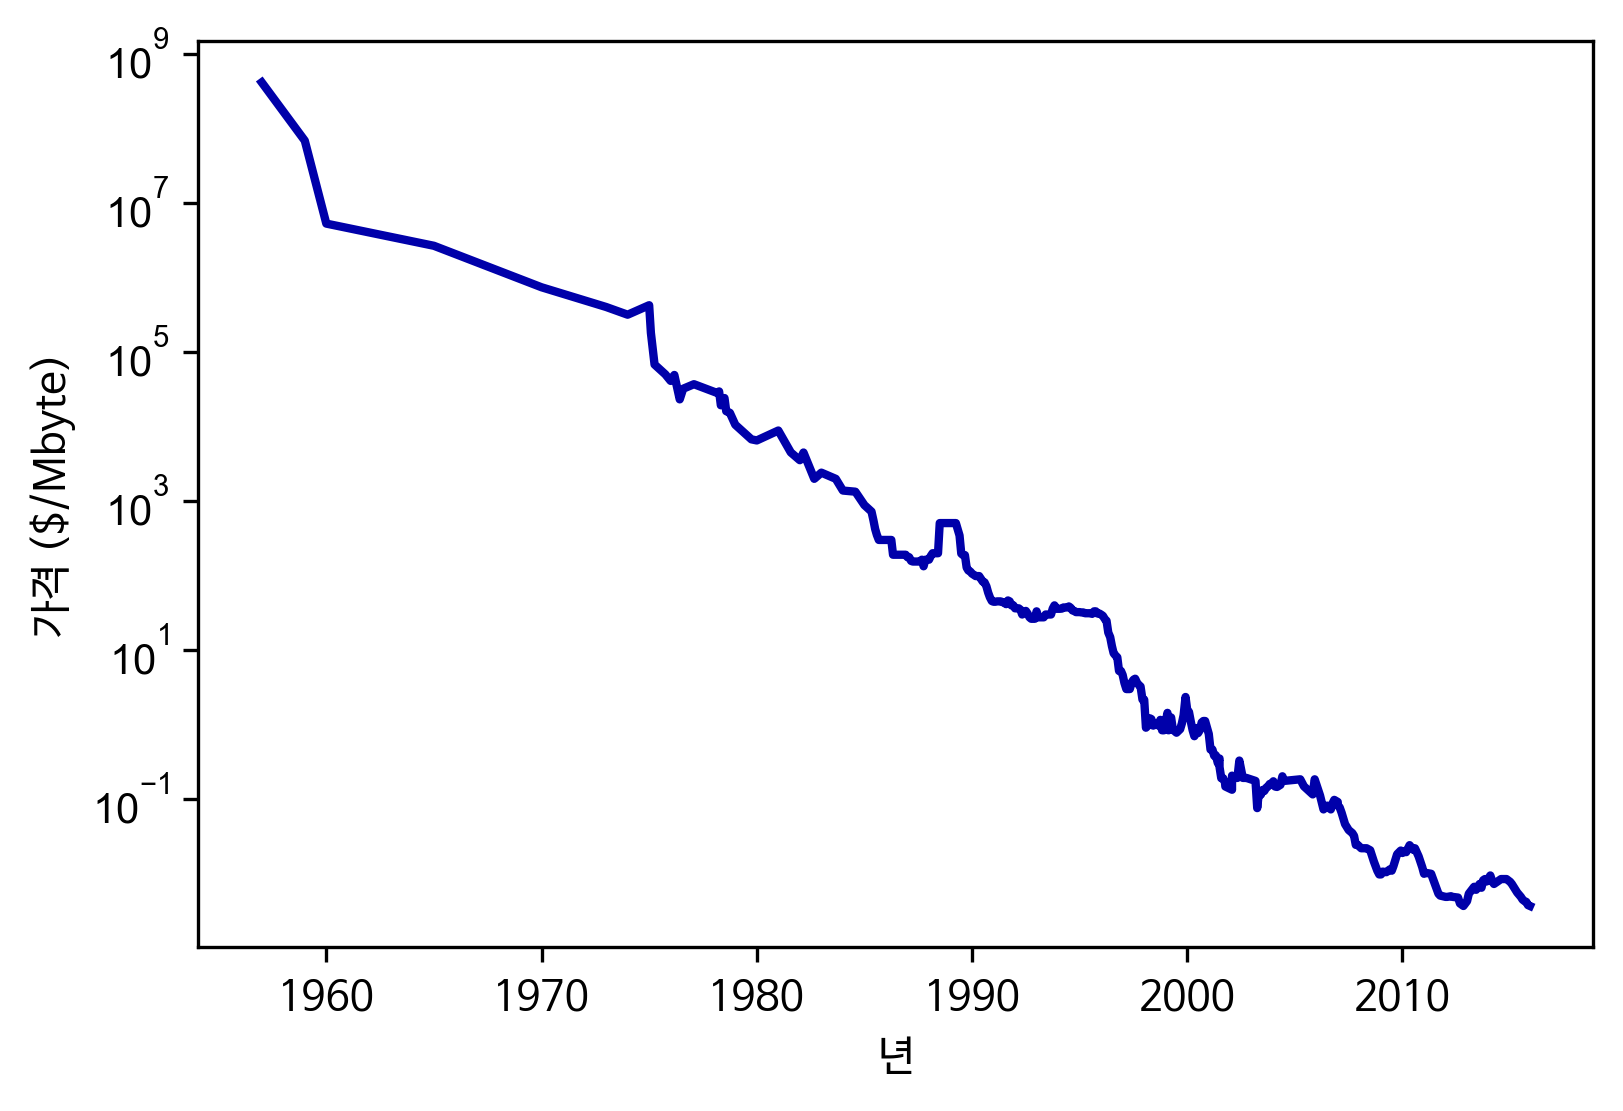

In [27]:
print("ram_prices.shape:{}".format(ram_prices.shape))
print("ram_prices.keys:{}".format(ram_prices.keys()))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]
#2000년 이전의 데이터를 훈련, 이후의 데이터를 테스트 데이터로 사용
print("data_train.shape:{}".format(data_train.shape),"data_test.shape:{}".format(data_test.shape))
#가격 예측을 위해 날짜 특성 사용
X_train=data_train.date[:,np.newaxis]
#로그 스케일로 변경하여 데이터와 타깃 사이의 관계를 간단하게 함
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)
#예측은 전체 기간에 대해 수행
X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
#로그 취한거 다시 되돌려줌
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

data_train.shape:(202, 3) data_test.shape:(131, 3)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


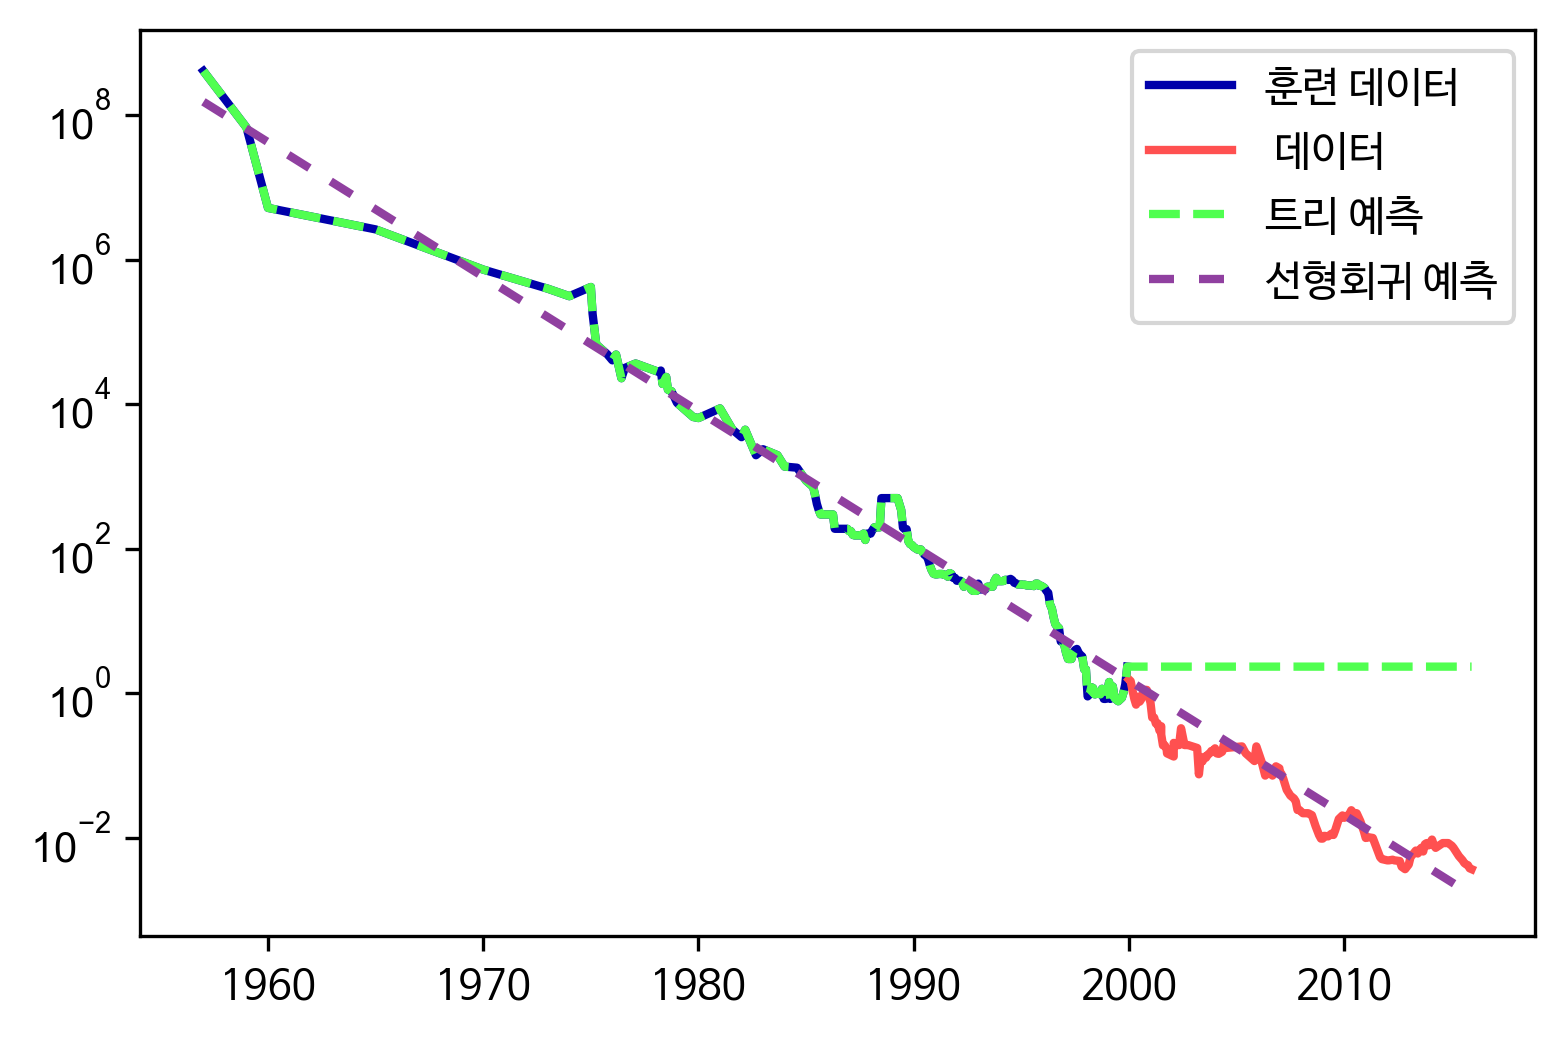

In [29]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date,data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date,data_test.price, label=" 데이터")
plt.semilogy(ram_prices.date,price_tree, label="트리 예측")
plt.semilogy(ram_prices.date,price_lr, label="선형회귀 예측")
plt.legend()

일정기간에 대해 시간의 함수로 표현되는 데이터인 시계열 데이터에는 결정트리 회귀가 잘 맞지않음(그래프에서 트리예측 2000이후 부분)

### Random Forset

Decision Tree는 overfitting될 가능성이 높다는 약점을 가지고 있습니다. 가지치기를 통해 트리의 최대 높이를 설정해 줄 수 있지만 이로써는 overfitting을 충분히 해결할 수 없습니다. 

그러므로 좀더 일반화된 트리를 만드는 방법을 생각해야합니다. 이는 Random Forest(랜덤 포레스트)의 기원이 되는 아이디어입니다. 

Random forest는 ensemble(앙상블) machine learning 모델입니다. 

Bagging은 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계(Aggregating) 하는 방법

Boosting도 Bagging과 동일하게 복원 랜덤 샘플링을 하지만, 가중치를 부여한다는 차이점이 있습니다. Bagging이 병렬로 학습하는 반면, Boosting은 순차적으로 학습시킵니다. 학습이 끝나면 나온 결과에 따라 가중치가 재분배됩니다.

https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

https://swalloow.github.io/bagging-boosting/

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [31]:
X,y=make_moons(n_samples=100, noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.840



교차 검증(cross validation)

고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합되어버리는 결과가 생긴다. 이를 해결하고자 하는 것이 바로 교차 검증(cross validation)이다.

https://m.blog.naver.com/ckdgus1433/221599517834

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

dt=DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=0)
dt.fit(X_train,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.840



In [36]:
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}\n".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.972

테스트 세트 정확도 CV=10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


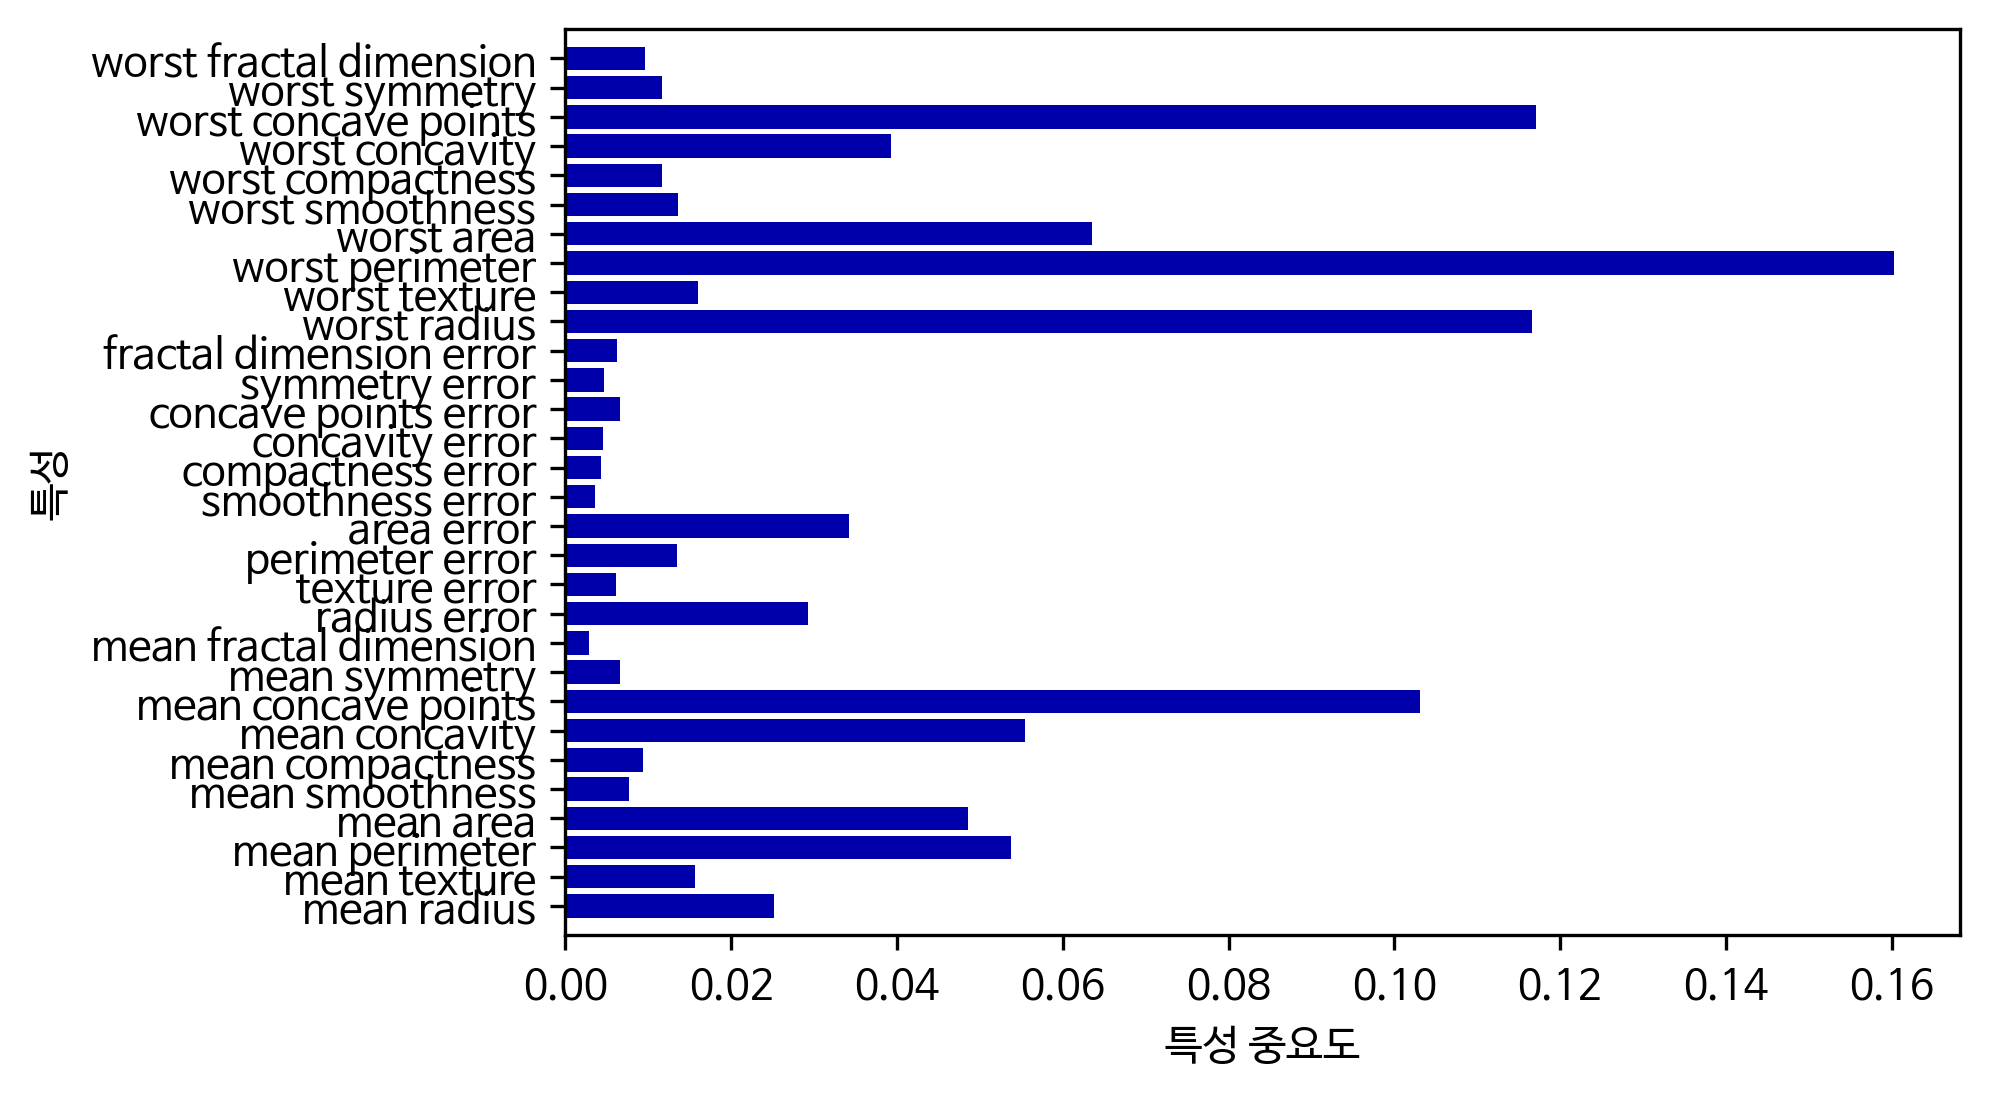

In [37]:
plot_feature_importances_cancer(forest)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gradient boosting regression tree는 여러 개의 decision tree를 묶어 강력한 model을 만드는 ensemble기법입니다.

random forest와 달리 gradient boosting model은 이전 tree의 오차를 보완하는 방식으로 tree를 만듭니다.
https://woolulu.tistory.com/30

In [39]:
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.965



깊이 3인 트리 100개

In [40]:
cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도 CV=10: 0.890

테스트 세트 정확도 CV=5: 0.850



과대 적합 피하기 위해서 트리의 최대 깊이를 줄여 사전 가지치기

In [41]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test,y_test)))

cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.991

테스트 세트 정확도: 0.972

테스트 세트 정확도 CV=10: 0.890

테스트 세트 정확도 CV=5: 0.870



트리의 최대 깊이를 낮추어 과적합을 피하고 테스트 데이터 성능 향상

In [42]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test,y_test)))

cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.988

테스트 세트 정확도: 0.965

테스트 세트 정확도 CV=10: 0.870

테스트 세트 정확도 CV=5: 0.860



학습률을 낮추었다

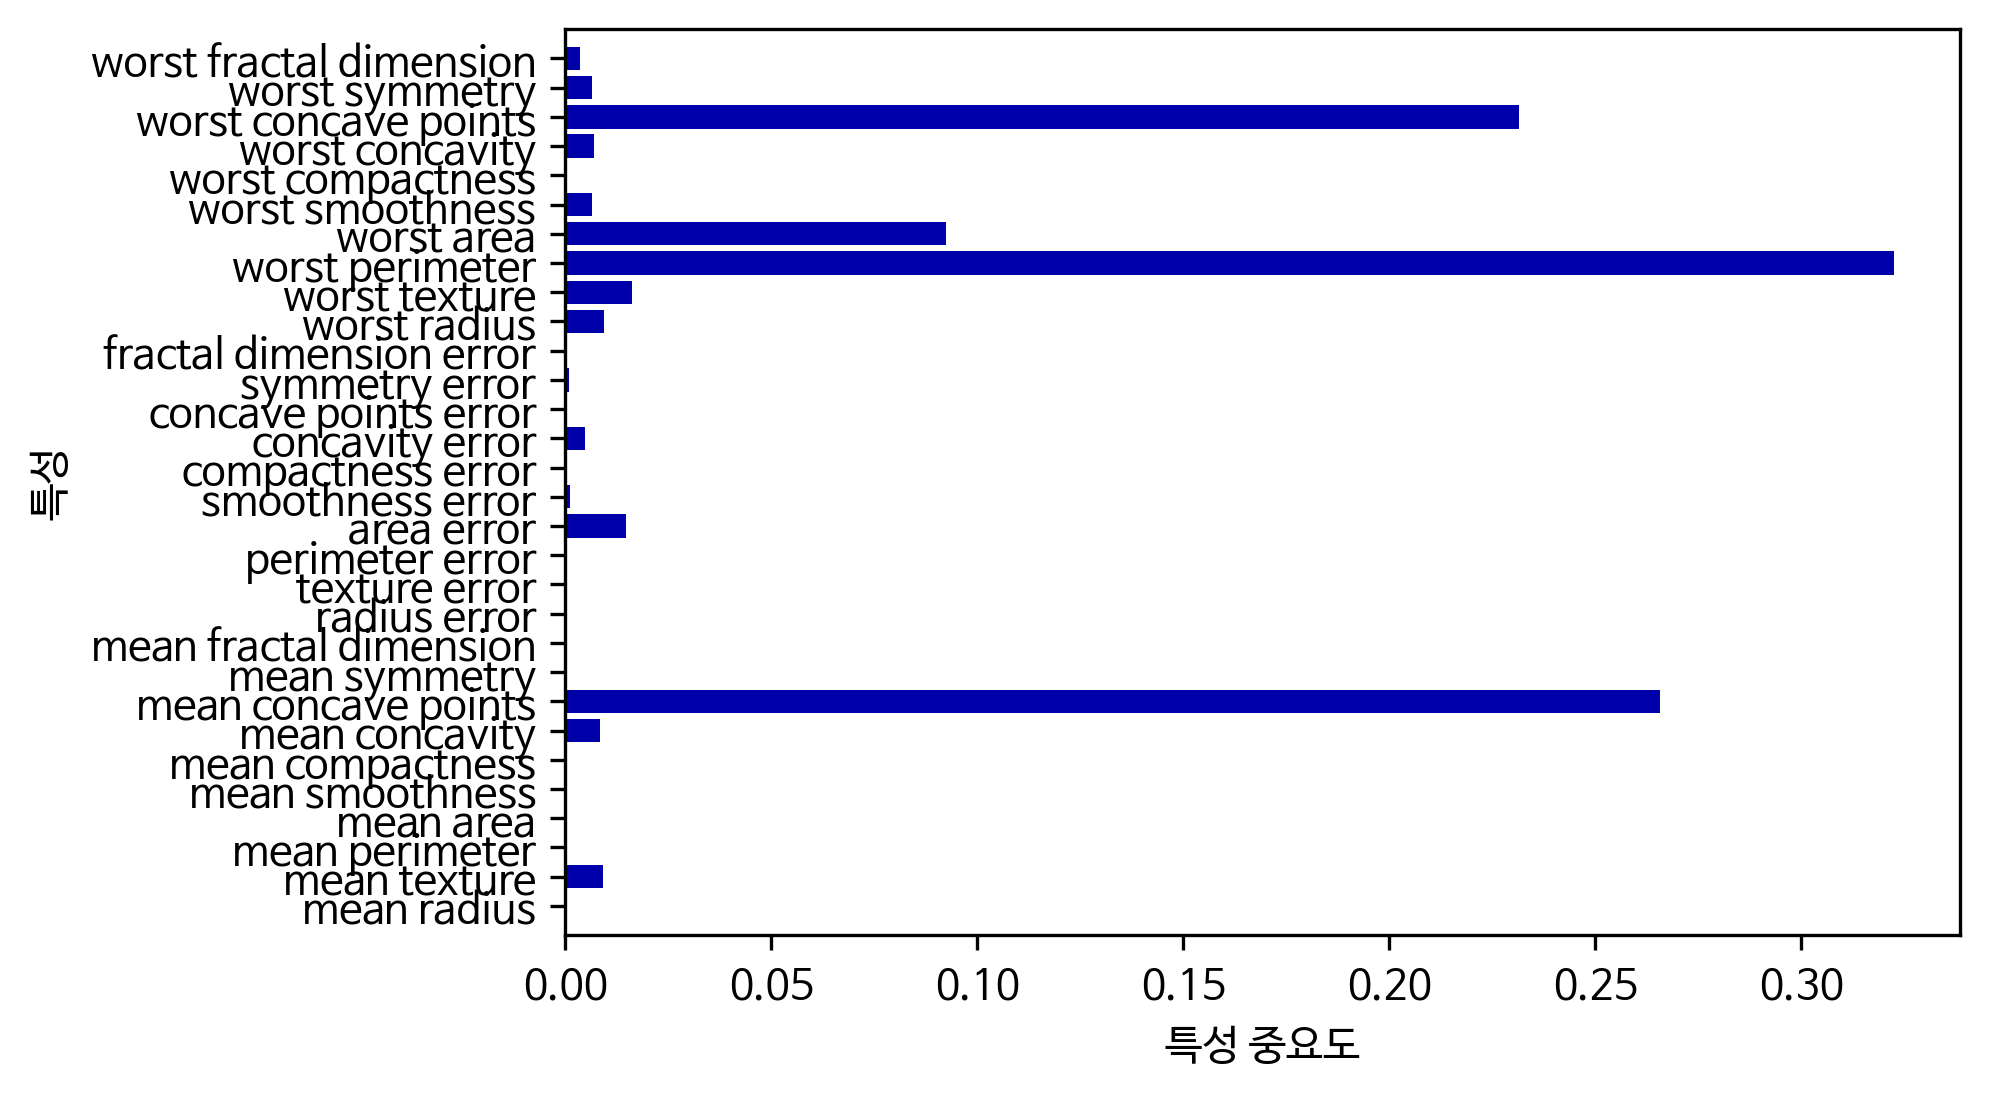

In [43]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

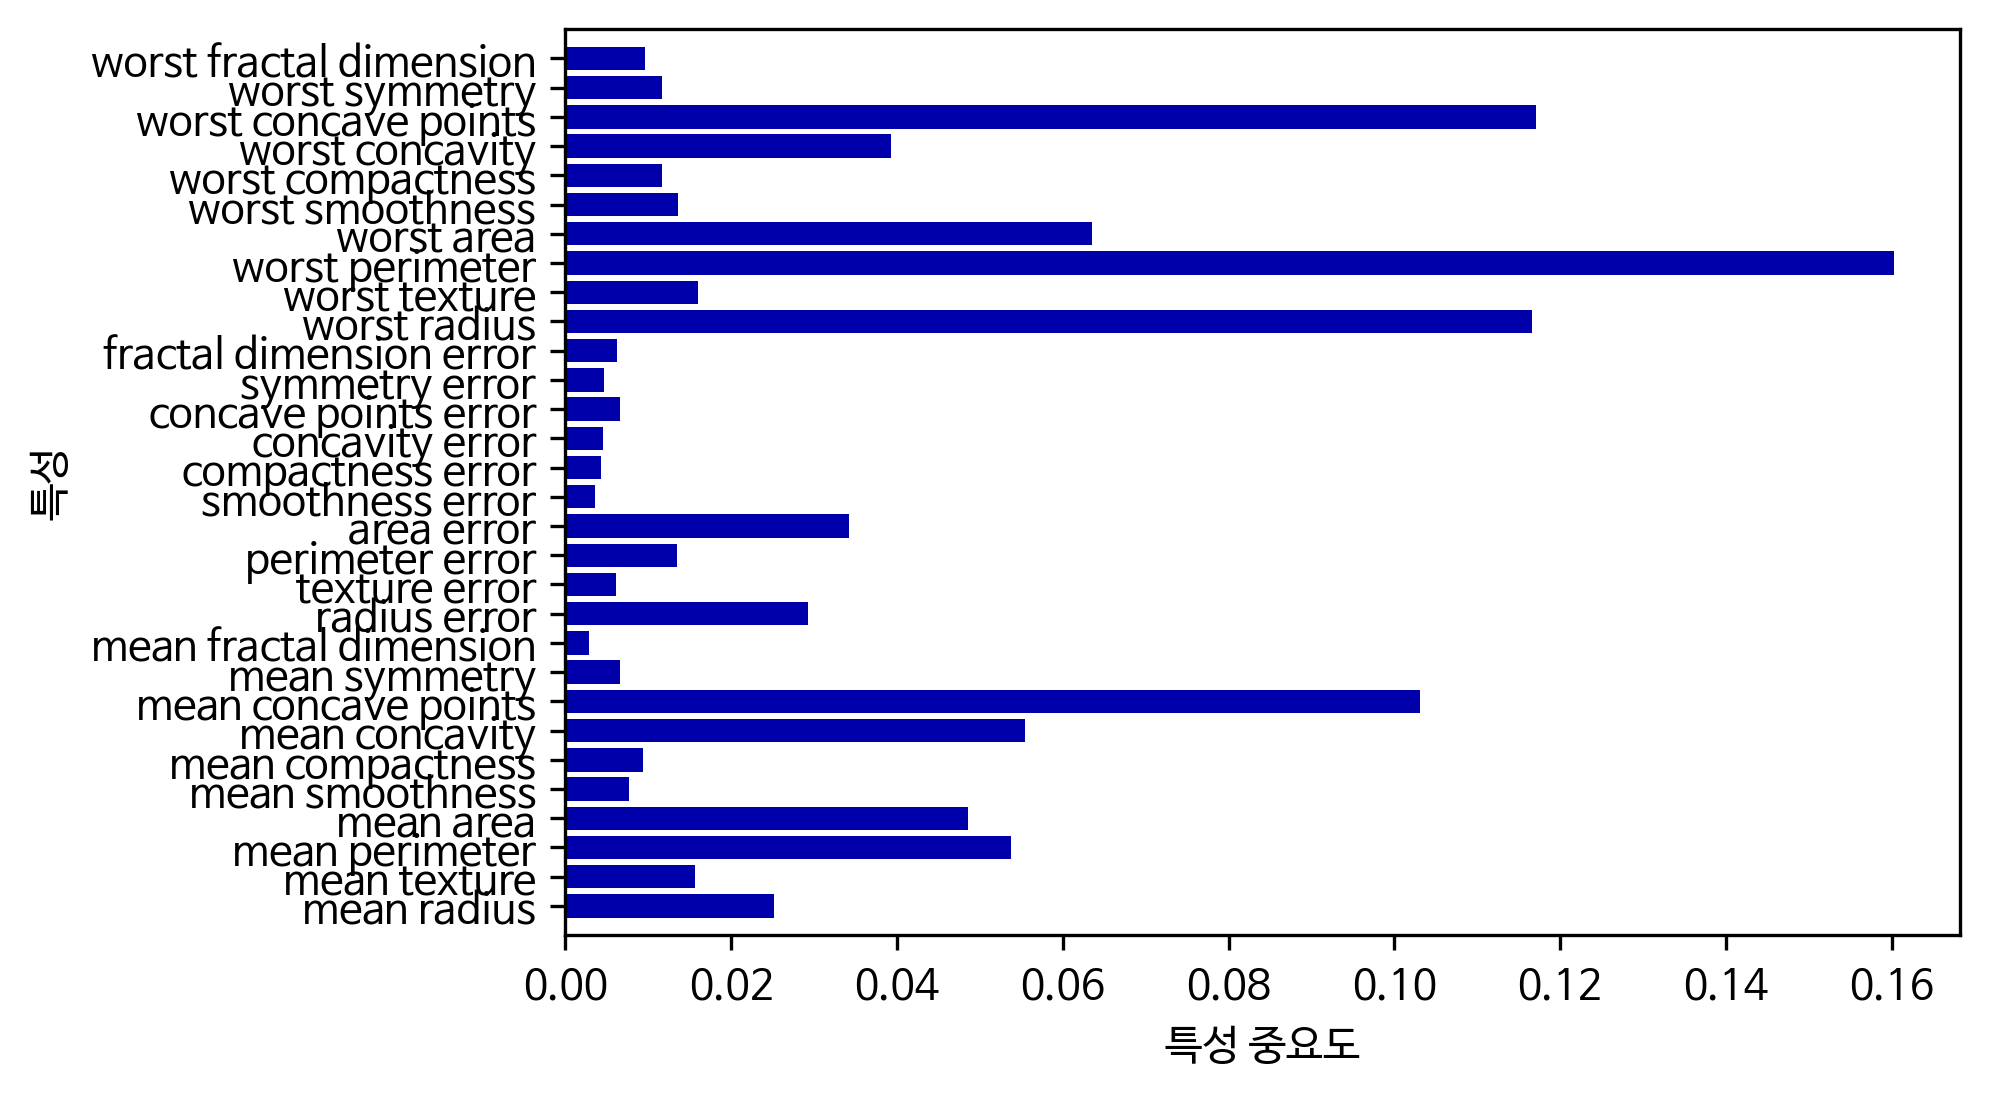

In [44]:
plot_feature_importances_cancer(forest)

일부 중요하지 않은 특성들을 무시했다